In [2]:
import numpy as np
import pandas as pd

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [4]:
def get_lower_and_upper_bounds(df, multiplier = 1.5):
    # set the quartile
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    # calculate the inter-quartile range
    iqr = q3 - q1
    
    # set lower and upperbound
    lower = q1 - (iqr * multiplier)
    upper = q3 + (iqr * multiplier)
    
    return lower, upper

Using lemonade.csv dataset and focusing on continuous variables:

In [5]:
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [6]:
# check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


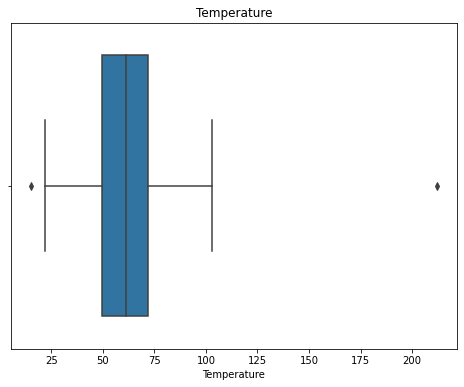

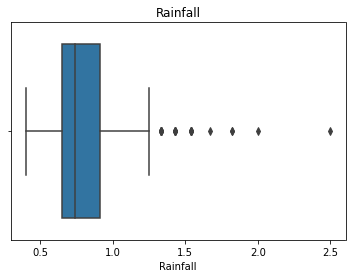

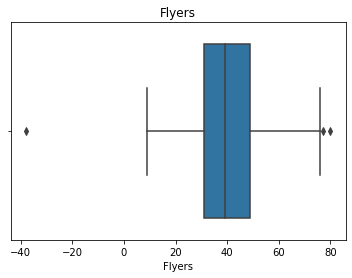

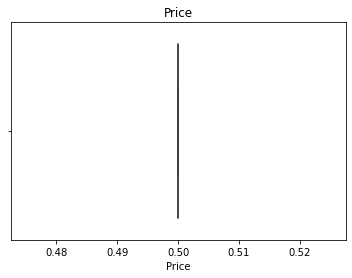

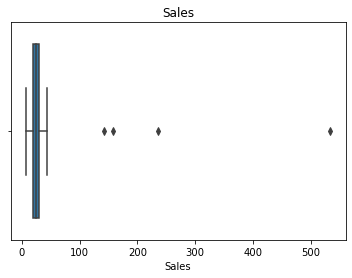

In [7]:
# plot numeric columns to check for outliers
plt.figure(figsize=(8,6))

for cnt, col in enumerate(df.columns[2:7]):
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.show()

In [8]:
# create a list of the numerical values
columns = df.columns[2:7].tolist()

In [9]:
# get upper and lower bounds for numerical columns
for col in columns:
    print(f'The {col} columns upper and lower bound values are: {get_lower_and_upper_bounds(df[col])}')

The Temperature columns upper and lower bound values are: (16.700000000000003, 104.7)
The Rainfall columns upper and lower bound values are: (0.26, 1.3)
The Flyers columns upper and lower bound values are: (4.0, 76.0)
The Price columns upper and lower bound values are: (0.5, 0.5)
The Sales columns upper and lower bound values are: (5.0, 45.0)


### 1.5 IQR
#### Temperature: Lower bound

In [10]:
# set bounds
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature)

In [11]:
# show dataframes
df[df.Temperature < temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


The lower bound range for Temperature was 16.7. There is an identified outlier of 15.1. 15.1 degrees doesn't seem to be abnormal so there shouldn't be an issue keeping this outlier.

### 1.5 IQR
#### Rainfall: Lower bound

In [12]:
# set bounds
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall)

In [13]:
# show df
df[df.Rainfall < rain_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers.

### 1.5 IQR
#### Flyers: Lower bound

In [14]:
# set bounds
flyers_lower, flyers_upper = get_lower_and_upper_bounds(df.Flyers)

In [15]:
# show df
df[df.Flyers < flyers_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


This will need to be removed. This is far outside the range.

### 1.5 IQR
#### Price: Lower bound

In [16]:
# set bounds
price_lower, price_upper = get_lower_and_upper_bounds(df.Price)

In [17]:
# show df 
df[df.Price < price_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers.

### 1.5 IQR
#### Sales: Lower bound

In [18]:
# set bounds
sales_lower, sales_upper = get_lower_and_upper_bounds(df.Sales)

In [19]:
# show df
df[df.Sales < sales_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


No outliers.

Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


### 1.5 IQR
#### Temperature: Upper bound

In [21]:
# already have our uppers, all we need is df
df[df.Temperature > temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


DEFINITELY needs to be removed.

### 1.5 IQR
#### Rainfall: Upper bound

In [22]:
# df
df[df.Rainfall > rain_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


Lots, idk

### 1.5 IQR
#### Flyers: Upper bound

In [26]:
df[df.Flyers > flyers_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


The Flyers columns upper and lower bound values are: (4.0, 76.0). These arent too far off so i'd keep them

### 1.5 IQR
#### Prices: Upper bound

In [27]:
df[df.Price > price_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

### 1.5 IQR
#### Sales: Upper bound

In [28]:
df[df.Sales > sales_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


The Sales columns upper and lower bound values are: (5.0, 45.0) All of these are way far off, I would remove

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [29]:
df[df.Temperature < get_lower_and_upper_bounds(df.Temperature, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

In [30]:
df[df.Rainfall < get_lower_and_upper_bounds(df.Rainfall, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

In [31]:
df[df.Flyers < get_lower_and_upper_bounds(df.Flyers, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


Doesn't make sense and should'nt be kept (neg value)

In [32]:
df[df.Price < get_lower_and_upper_bounds(df.Price, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

In [33]:
df[df.Sales < get_lower_and_upper_bounds(df.Sales, multiplier=3)[0]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [34]:
df[df.Temperature > get_lower_and_upper_bounds(df.Temperature, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


212 doesn't make sense

In [35]:
df[df.Rainfall > get_lower_and_upper_bounds(df.Rainfall, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


The Rainfall columns upper and lower bound values are: (0.26, 1.3). These are all very close so probably would keep.

In [36]:
df[df.Flyers > get_lower_and_upper_bounds(df.Flyers, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

In [37]:
df[df.Price > get_lower_and_upper_bounds(df.Price, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


None

In [38]:
df[df.Sales > get_lower_and_upper_bounds(df.Sales, multiplier=3)[1]]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


These are the same outliers as above when using a multiplier of 1.5. These are pretty far from the bounds so probably would get rid of.

Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?

<AxesSubplot:ylabel='Frequency'>

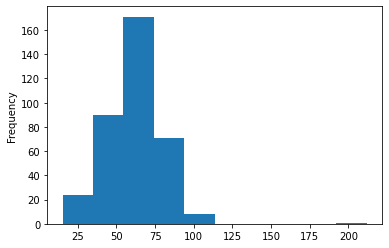

In [39]:
df.Temperature.plot(kind = 'hist')

Looks normal

In [40]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [41]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


These are all normal and should be kept except the 212 because that doesn't make sense.

<AxesSubplot:ylabel='Frequency'>

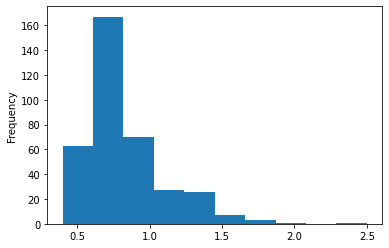

In [42]:
df.Rainfall.plot(kind = 'hist')

Looks normal

In [43]:
zscores = pd.Series((df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


In [44]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Nothing needs to be removed.

<AxesSubplot:ylabel='Frequency'>

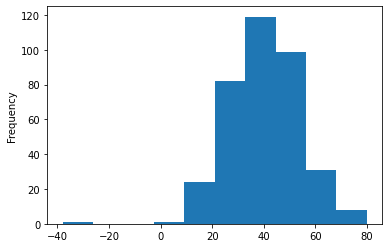

In [45]:
df.Flyers.plot(kind = 'hist')

Looks normal

In [46]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[zscores > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [47]:
df[zscores < -2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


All except negative should be kept

<AxesSubplot:ylabel='Frequency'>

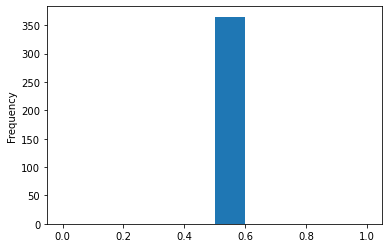

In [48]:
df.Price.plot(kind = 'hist')

Not normally distributed

<AxesSubplot:ylabel='Frequency'>

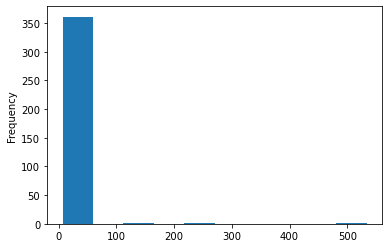

In [49]:
df.Sales.plot(kind = 'hist')

Not normal either

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [50]:
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [51]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [52]:
zscores = pd.Series((df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [53]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [54]:
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())
df[zscores > 3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [55]:
df[zscores < -3]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
